In [2]:
#loading the data file and required software libraries
#please load location of the "heart_data" file as df

import pandas as pd
df = pd.read_csv (r'C:\Users\breno\Desktop\heart.csv')

In [3]:
#exploration of data and division into categorical and numerical data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#calculation of correlation
#import seaborn to present correlation as a heat map 
#and as a scatter matrix (from pandas)
df.corr()
corr=df.corr()
print(corr)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

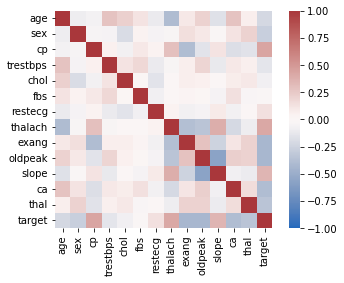

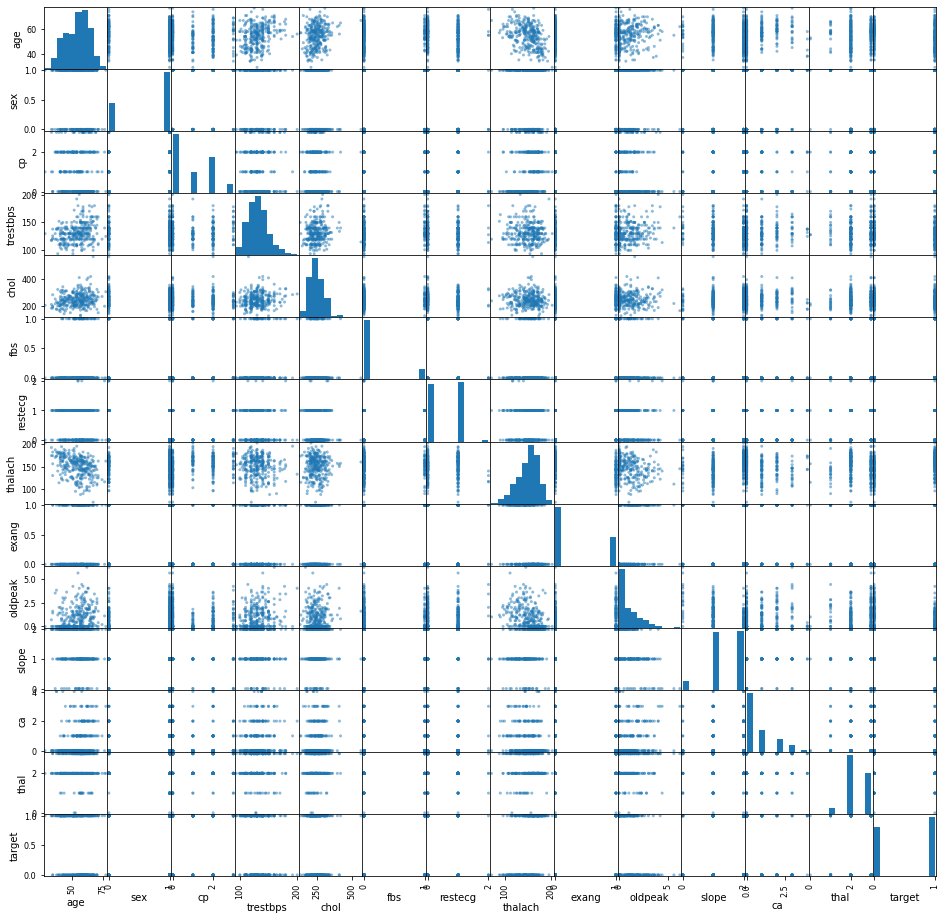

In [5]:
import seaborn as sns
cmap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap=cmap)

from pandas.plotting import scatter_matrix
a = scatter_matrix(df, figsize=(16, 16))

In [6]:
#creation of data frame filters needed for further data analysis

female_filter = df["sex"] == 0
male_filter = df["sex"] == 1

Text(0, 0.5, 'Resting Heart Rate (mmHg)')

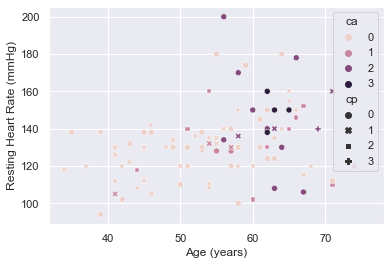

In [13]:
#initial visualisation of results and differences between sexes
import matplotlib.pyplot as plt

sns.scatterplot(data=df[female_filter], x="age", y="trestbps", hue="ca", style = "cp")
plt.xlabel("Age (years)")
plt.ylabel("Resting Heart Rate (mmHg)")

Text(0, 0.5, 'Resting Heart Rate (mmHg)')

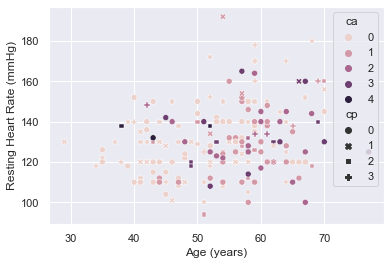

In [14]:
sns.scatterplot(data=df[male_filter], x="age", y="trestbps", hue="ca", style = "cp")
plt.xlabel("Age (years)")
plt.ylabel("Resting Heart Rate (mmHg)")

Text(237.91750000000002, 0.5, 'Resting Heart Rate (mmHg)')

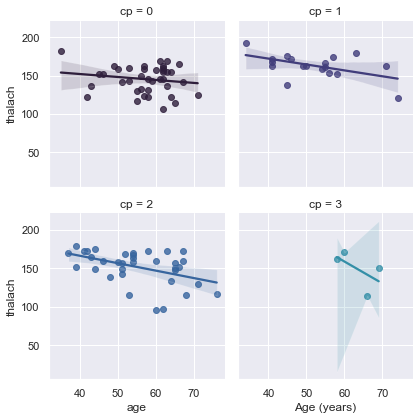

In [15]:
#analysis of linear models between age and resting blod pressure divided into different types of chest pain and sex

sns.set_theme(style="darkgrid", palette ="mako")

f = sns.lmplot(data=df[female_filter], x="age", y="thalach", hue="cp",col = "cp", col_wrap=2, height=3)

plt.xlabel("Age (years)")
plt.ylabel("Resting Heart Rate (mmHg)")

Text(237.91750000000002, 0.5, 'Resting Heart Rate (mmHg)')

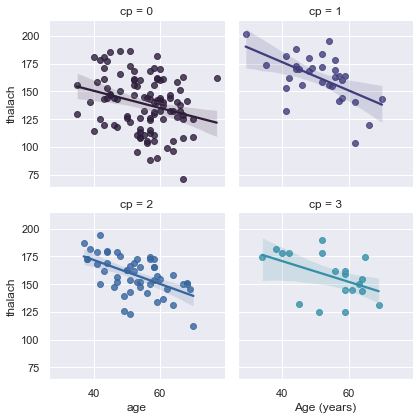

In [16]:
m = sns.lmplot(data=df[male_filter], x="age", y="thalach", hue="cp",col = "cp", col_wrap=2, height=3)
plt.xlabel("Age (years)")
plt.ylabel("Resting Heart Rate (mmHg)")

Text(1483.8352054149307, 0.5, 'Resting Heart Rate (mmHg)')

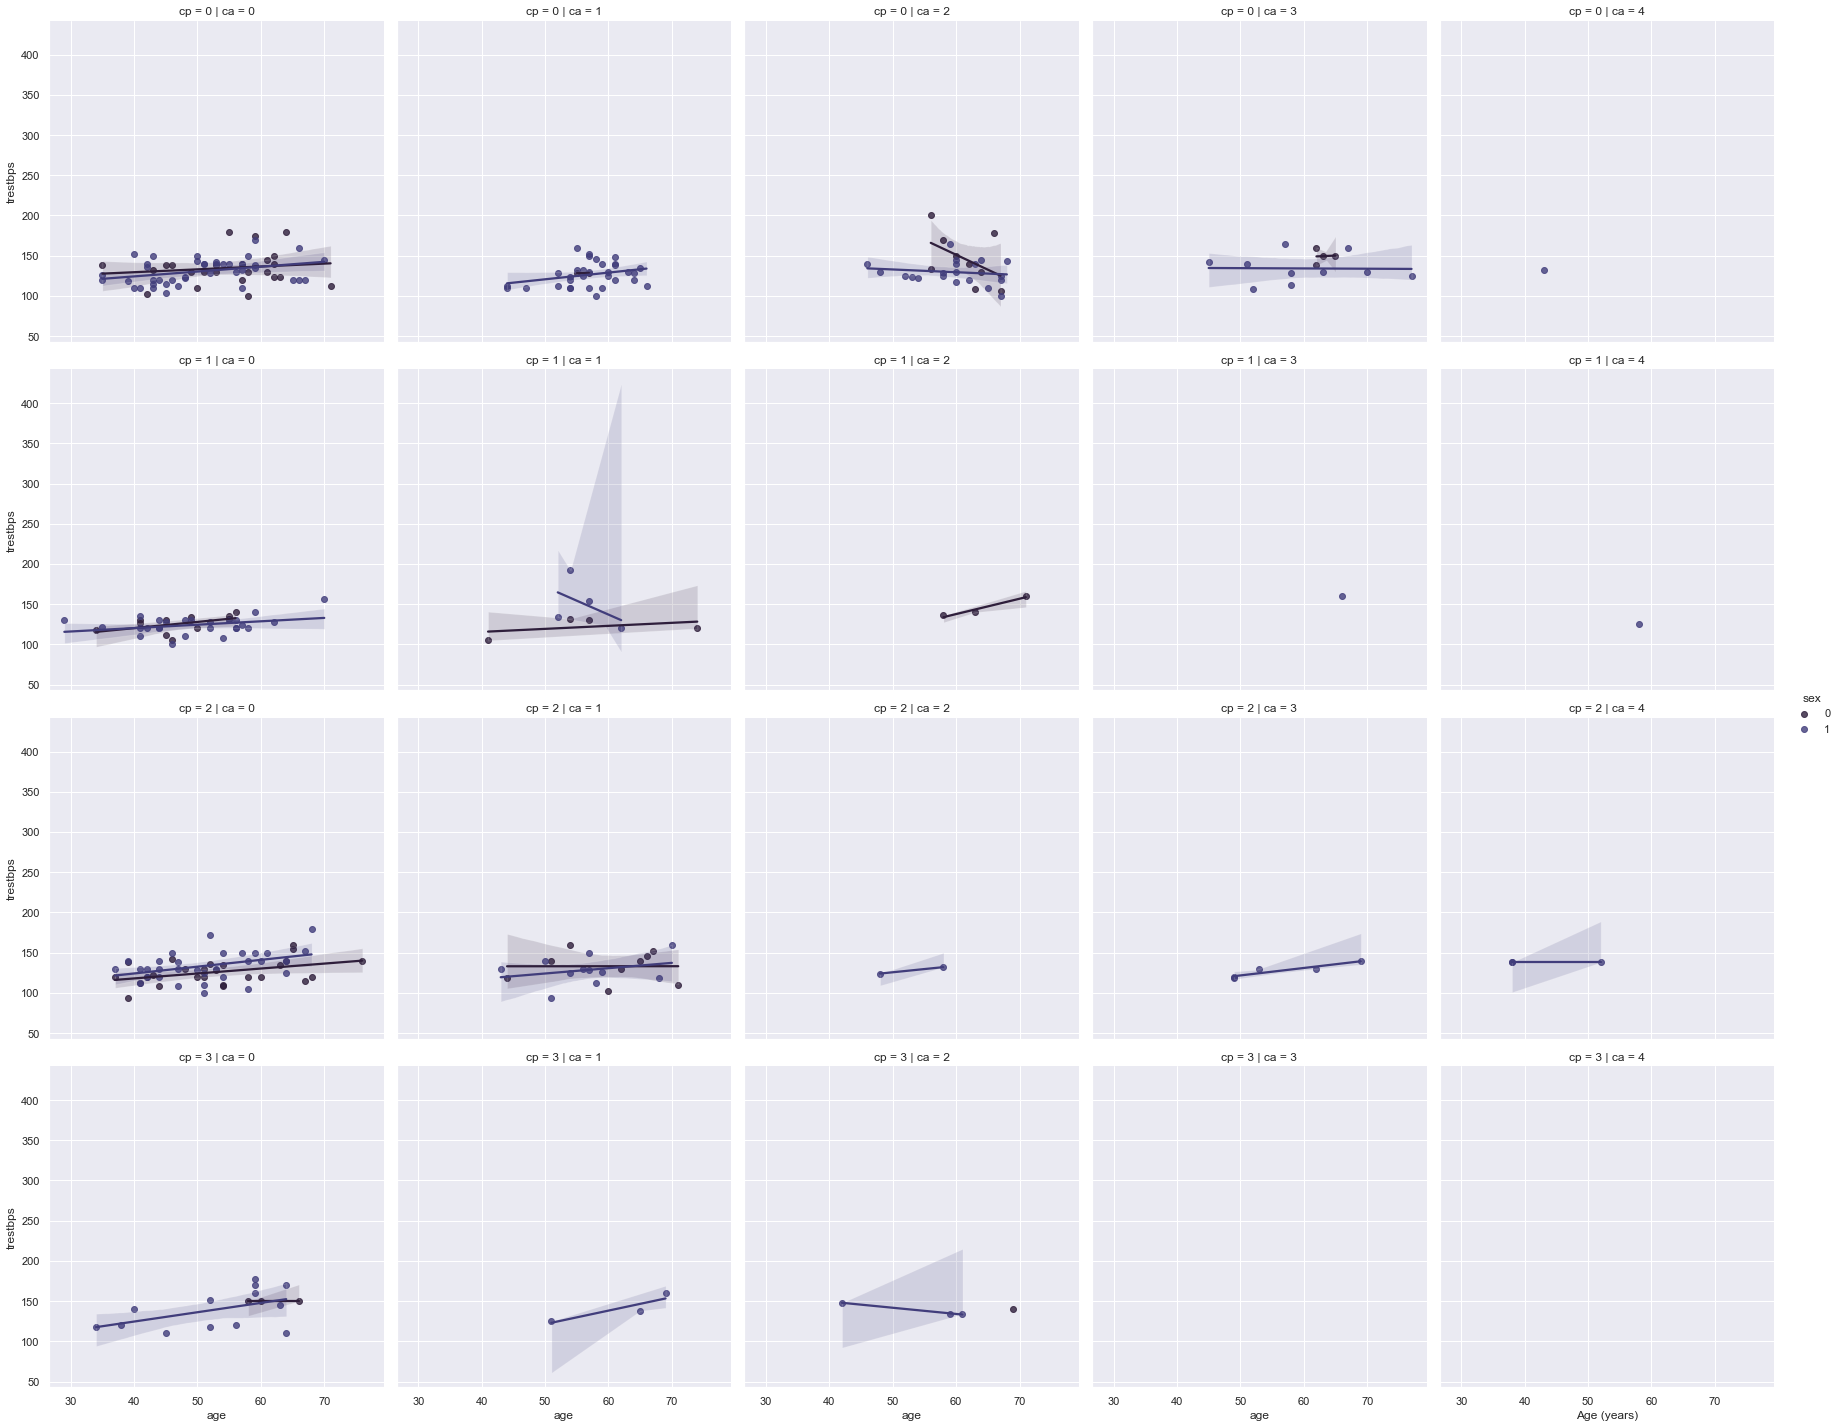

In [17]:
#analysis of linear models between age and resting blod pressure divided into different types of chest pain, number of blocked arteries and sex

sns.lmplot(data=df, x="age", y="trestbps", hue="sex", row="cp", col = "ca")
plt.xlabel("Age (years)")
plt.ylabel("Resting Heart Rate (mmHg)")

Text(0.5, 8.95999999999998, 'Resting Heart Rate (mmHg)')

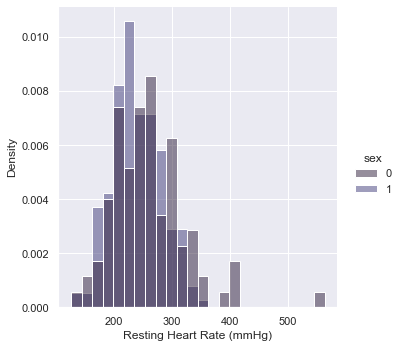

In [18]:
#histograms of cholesterol and resting blood pressure levels based on the sex

sns.displot(data=df, x="chol", hue = "sex", stat="density", common_norm=False)
plt.xlabel("Resting Heart Rate (mmHg)")

Text(0.5, 8.95999999999998, 'Cholesterol levels in plasma (mg/dl)')

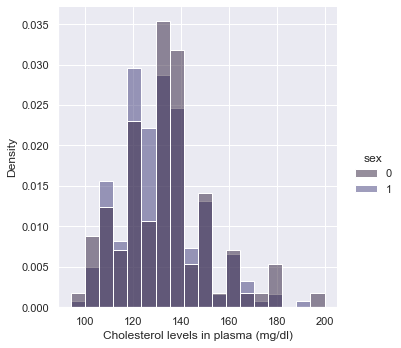

In [34]:
sns.displot(data=df, x="trestbps", hue = "sex", stat="density", common_norm=False)
plt.xlabel("Cholesterol levels in plasma (mg/dl)")

In [19]:
#linear regression model of the dependency of resting blood pressure based on age, with training and test data

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [20]:
heart_X = df[["age"]]
heart_Y = df[["trestbps"]]

In [21]:
#training set was set to 15% of the data available

train_X, test_X, train_y, test_y = train_test_split(heart_X, heart_Y, random_state=46)

regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)

heart_y_pred = regr.predict(test_X)

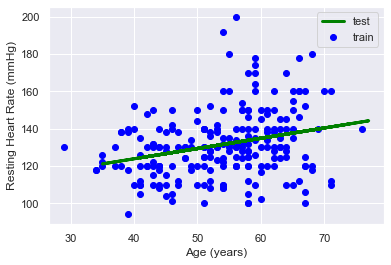

In [23]:
#ploting of the data

fig, ax = plt.subplots()

ax.scatter(train_X, train_y, color="blue", marker="o", label="train")
ax.plot(test_X, heart_y_pred, color="green", linewidth=3, label="test")
plt.xlabel("Age (years)")
plt.ylabel("Resting Heart Rate (mmHg)")
ax.legend()

In [24]:
#calculation of the characteristics of the model set to 2 decimal points

print("Model gradient: %.2f" % regr.coef_[0])
print("Model intercept: %.2f" % regr.intercept_)
print("Model score: %.2f" % regr.score(test_X, test_y))
print("Mean squared error: %.2f" % mean_squared_error(test_y, heart_y_pred))
print("Coefficient of determination: %.2f" % r2_score(test_y, heart_y_pred))

Model gradient: 0.55
Model intercept: 101.82
Model score: 0.08
Mean squared error: 252.18
Coefficient of determination: 0.08


In [25]:
#linear regression model of the dependency between cholesterol levels in plasma and resting heart rate, with training and test data

chol_X = df[["chol"]]
chol_Y = df[["trestbps"]]

train_X_c, test_X_c, train_Y_c, test_Y_c = train_test_split(chol_X, chol_Y, random_state=46)

In [26]:
regr_c = linear_model.LinearRegression()
regr_c.fit(train_X_c, train_Y_c)

chol_y_pred = regr_c.predict(test_X_c)

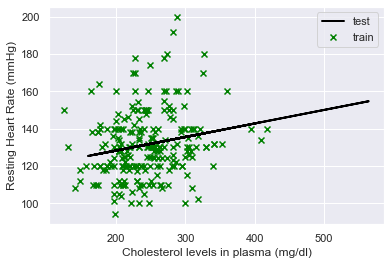

In [27]:
fig, ax = plt.subplots()

ax.scatter(train_X_c, train_Y_c, color="green", marker="x", label="train")
ax.plot(test_X_c, chol_y_pred, color="black", linewidth=2, label="test")
plt.xlabel("Cholesterol levels in plasma (mg/dl)")
plt.ylabel("Resting Heart Rate (mmHg)")
ax.legend()

In [28]:
print("Model gradient: %.2f" % regr_c.coef_[0])
print("Model intercept: %.2f" % regr_c.intercept_)
print("Model score: %.2f" % regr_c.score(test_X, test_y))
print("Mean squared error: %.2f" % mean_squared_error(test_y, heart_y_pred))
print("Coefficient of determination: %.2f" % r2_score(test_y, heart_y_pred))

Model gradient: 0.07
Model intercept: 113.65
Model score: -0.77
Mean squared error: 252.18
Coefficient of determination: 0.08
